<a href="https://colab.research.google.com/github/MiguelCabreraVictoria/Modelo_Clasificador/blob/main/Mini_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <a href="https://th.bing.com/th/id/OIP.M3ZVpTqlXWAamrQLLuXSpQHaB9?rs=1&pid=ImgDetMain">
    <img src="https://th.bing.com/th/id/OIP.M3ZVpTqlXWAamrQLLuXSpQHaB9?rs=1&pid=ImgDetMain" alt="Texto alternativo" style="width:300px;">
  </a>
</div>


<h2><b>Nombre: </b> Miguel Angel Cabrera Victoria
<h3><b>Matricula: </b> A01782982
<h3><b>Fecha: </b> 12 de Septiembre del 2024

In [106]:
"Liberia y Configuracion Google Colab "
from google.colab import drive
drive.mount('/content/drive')

"Librerias basicas / Visualizacion"
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

"Librerias de Mechine Learning"
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score


"""
Constantes
"""
DATA_TRAIN_PATH = "/content/drive/MyDrive/Tec/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos/Evidencias/DataSet/training_data"
DATA_TEST_PATH = "/content/drive/MyDrive/Tec/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos/Evidencias/DataSet/test_data"

MAPEO_ETIQUETAS = {'carros': 'carro',
                     'motos': 'moto',
                     'pickups': 'pickup'}

NUMERO_CLASES = len(MAPEO_ETIQUETAS)


nombre_etiquetas = list(MAPEO_ETIQUETAS.values())

# Crear un DataFrame con las etiquetas (solo para visualizacion en el Notebook )
df_etiquetas = pd.DataFrame(nombre_etiquetas, columns=['Nombre de las Etiquetas'])
df_etiquetas

X_train = [] # vectores del conjunto de entrenamiento
y_train = [] # etiquetas de conjunto de entrenamiento

X_test = [] # vectores del conjunto de prueba
y_test = [] # etiquetas de conjunto de prueba

TAMAÑO_IMAGEN = (128, 128)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
df_etiquetas

,Nombre de las Etiquetas
0,carro
1,moto
2,pickup


In [108]:
def cargar_imagenes_desde_carpeta(carpeta, etiqueta, tamaño_imagen=TAMAÑO_IMAGEN):
    imagenes = []
    etiquetas = []
    for imagen in os.listdir(carpeta):
        img_path = os.path.join(carpeta, imagen)
        if img_path.lower().endswith('.png'):
            img = cv2.imread(img_path)
            if img is not None:
                #print(f"Tamaño original de la imagen: {img.shape}")  # Imprimir tamaño original
                img = cv2.resize(img, tamaño_imagen)
                #print(f"Tamaño después de redimensionar: {img.shape}")  # Imprimir tamaño después de redimensionar
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
                img = img.reshape((tamaño_imagen[0], tamaño_imagen[1], 1))  # Añadir la dimensión adicional de canal
                imagenes.append(img)
                etiquetas.append(etiqueta)
    return imagenes, etiquetas


for nombre_carpeta in os.listdir(DATA_TRAIN_PATH):
  carpeta_path = os.path.join(DATA_TRAIN_PATH, nombre_carpeta)
  etiqueta = MAPEO_ETIQUETAS.get(nombre_carpeta, nombre_carpeta)
  imagenes, etiquetas = cargar_imagenes_desde_carpeta(carpeta_path, etiqueta)
  X_train.extend(imagenes)
  y_train.extend(etiquetas)

for nombre_carpeta in os.listdir(DATA_TEST_PATH):
  carpeta_path = os.path.join(DATA_TEST_PATH, nombre_carpeta)
  etiqueta = MAPEO_ETIQUETAS.get(nombre_carpeta, nombre_carpeta)
  imagenes, etiquetas = cargar_imagenes_desde_carpeta(carpeta_path, etiqueta)
  X_test.extend(imagenes)
  y_test.extend(etiquetas)


# Convertir a numpy arrays
X_train = np.array(X_train)
#print(X_train.shape)
y_train = np.array(y_train)
X_test = np.array(X_test)
#print(X_test.shape)
y_test = np.array(y_test)

In [109]:
def graficar_frecuencia_etiquetas(etiquetas, t_conjunto):
  frecuencia_etiquetas = Counter(etiquetas)
  etiquetas = list(frecuencia_etiquetas.keys())
  frecuencias = list(frecuencia_etiquetas.values())
  titulo = f"Frecuencia de Etiquetas {t_conjunto}"

  df = {'Etiqueta': etiquetas,'Frecuencia': frecuencias}
  fig = px.bar(df, x='Etiqueta', y='Frecuencia', title=titulo, labels={'Etiqueta': 'Etiquetas', 'Frecuencia': 'Frecuencia'}, color='Etiqueta')
  fig.show()

In [110]:
graficar_frecuencia_etiquetas(y_train, "Entrenamiento")

In [111]:
graficar_frecuencia_etiquetas(y_test, "Prueba")

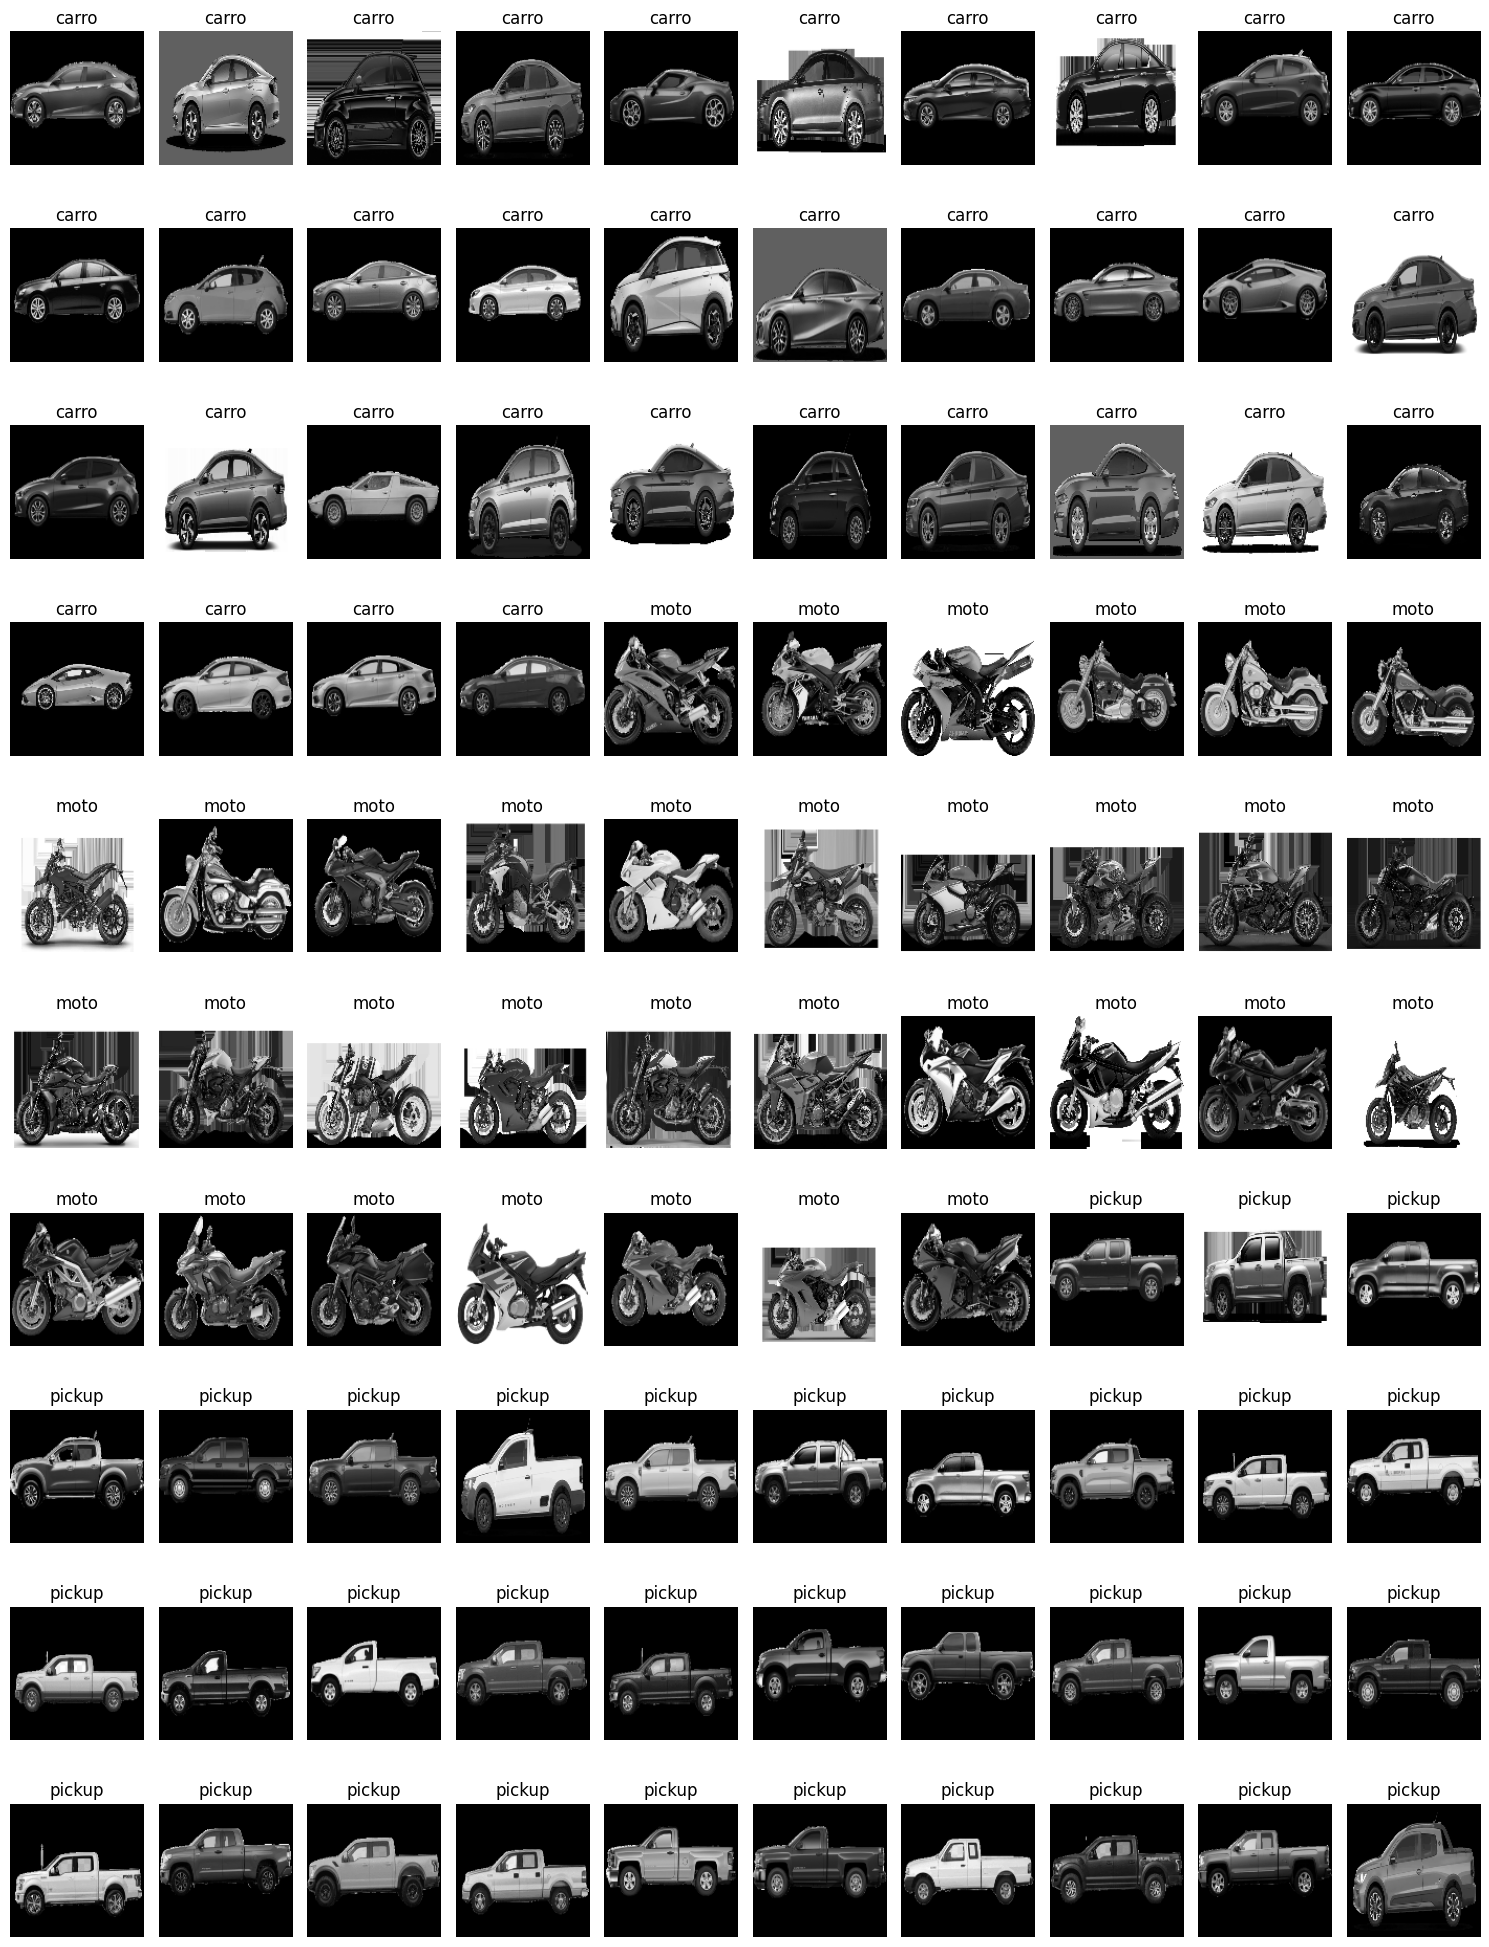

In [112]:
def graficar_imagenes_con_etiquetas(imagenes, etiquetas):

  plt.figure(figsize=(15, 20))
  for i in range(len(imagenes)):
    plt.subplot(10, 10, i + 1) # 10x10 = 100
    plt.imshow(cv2.cvtColor(imagenes[i], cv2.COLOR_BGR2RGB))
    plt.title(etiquetas[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

graficar_imagenes_con_etiquetas(X_train, y_train)

In [113]:
def normalizar(datos):
  return np.array(datos).astype(float) / 255.0

X_train =  normalizar(X_train)
X_test = normalizar(X_test)

In [114]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
df_etiquetas_encoded = pd.DataFrame({'Etiqueta Original': label_encoder.classes_, 'Etiqueta Codificada': label_encoder.transform(label_encoder.classes_)})
y_train_one_hot = to_categorical(y_train_encoded)

In [115]:
df_etiquetas_encoded

,Etiqueta Original,Etiqueta Codificada
0,carro,0
1,moto,1
2,pickup,2


In [116]:
def modelo_red_neuronal_densa(input_shape=(128,128,1), num_clases= 3):
  modelo = Sequential()
  modelo.add(Flatten(input_shape=input_shape)) #capa de entrada 128x128 = 16384
  modelo.add(Dense(300, activation='relu')) #capa oculta 1: 3000
  modelo.add(Dense(128, activation='relu')) #capa oculta 2: 128
  modelo.add(Dense(num_clases, activation='softmax')) #capa oculta : 3
  return modelo

modelo = modelo_red_neuronal_densa()

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.summary()

historial = modelo.fit(X_train, y_train_one_hot, epochs=9, batch_size=32, validation_split=0.2,verbose=1 )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_64 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ (None, 300)                 │       4,915,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,954,415 (18.90 MB)

 Trainable params: 4,954,415 (18.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.5297 - loss: 2.0839 - val_accuracy: 0.9000 - val_loss: 0.2338
Epoch 2/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6313 - loss: 1.7602 - val_accuracy: 0.0000e+00 - val_loss: 3.2187
Epoch 3/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.7969 - loss: 0.5035 - val_accuracy: 1.0000 - val_loss: 0.2124
Epoch 4/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9023 - loss: 0.2723 - val_accuracy: 0.9000 - val_loss: 0.4395
Epoch 5/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9352 - loss: 0.3163 - val_accuracy: 0.2500 - val_loss: 1.2088
Epoch 6/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9656 - loss: 0.1830 - val_accuracy: 0.9000 - val_loss: 0.3414
Epoch 7/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9695 - loss: 0.1720 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 8/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9898 - loss: 0.1221 - val_accuracy: 0.9500 - val_loss: 0.2300


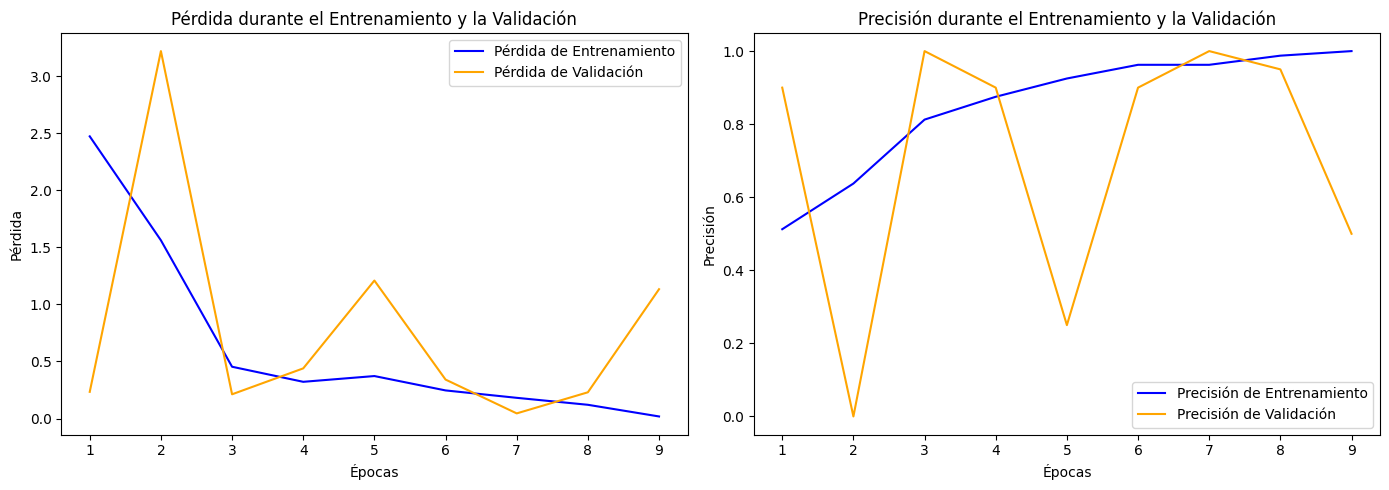

In [117]:
def graficar_historial(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)


    plt.figure(figsize=(14, 5))

    # Gráfico de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Pérdida de Entrenamiento', color='blue')
    plt.plot(epochs, val_loss, label='Pérdida de Validación', color='orange')
    plt.title('Pérdida durante el Entrenamiento y la Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Precisión de Entrenamiento', color='blue')
    plt.plot(epochs, val_accuracy, label='Precisión de Validación', color='orange')
    plt.title('Precisión durante el Entrenamiento y la Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
graficar_historial(historial)

In [118]:
def evaluar_modelo(modelo, X_test, y_test, label_encoder):
  loss, accuracy = modelo.evaluate(X_test, to_categorical(label_encoder.transform(y_test)), verbose=1)
  print(f"Pérdida del Modelo: {loss}")
  print(f"Precisión del Modelo: {accuracy}")

  y_pred = modelo.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  y_test_decoded = label_encoder.transform(y_test)

  print("Reporte de Clasificación:")
  print(classification_report(y_test_decoded, y_pred_classes, target_names=label_encoder.classes_))

  exactitud = accuracy_score(y_test_decoded, y_pred_classes)
  precision = precision_score(y_test_decoded, y_pred_classes, average='weighted')
  recall = recall_score(y_test_decoded, y_pred_classes, average='weighted')
  f1 = f1_score(y_test_decoded, y_pred_classes, average='weighted')

  df_metricas = ({
      'Metrica': ['Exactitud', 'Precision', 'Recall', 'F1-Score'],
      'Valor': [exactitud, precision, recall, f1]
  })

  print(f"Precisión del Modelo: {accuracy}")


  cm = confusion_matrix(y_test_decoded, y_pred_classes)
  return df_metricas, cm

df_metricas, cm = evaluar_modelo(modelo, X_test, y_test, label_encoder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9500 - loss: 0.2116
Pérdida del Modelo: 0.21162395179271698
Precisión del Modelo: 0.949999988079071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       carro       0.88      1.00      0.93         7
        moto       1.00      1.00      1.00         6
      pickup       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Precisión del Modelo: 0.949999988079071


In [119]:
df_metricas = pd.DataFrame(df_metricas)
df_metricas

,Metrica,Valor
0,Exactitud,0.950000
1,Precision,0.956250
2,Recall,0.950000
3,F1-Score,0.949744


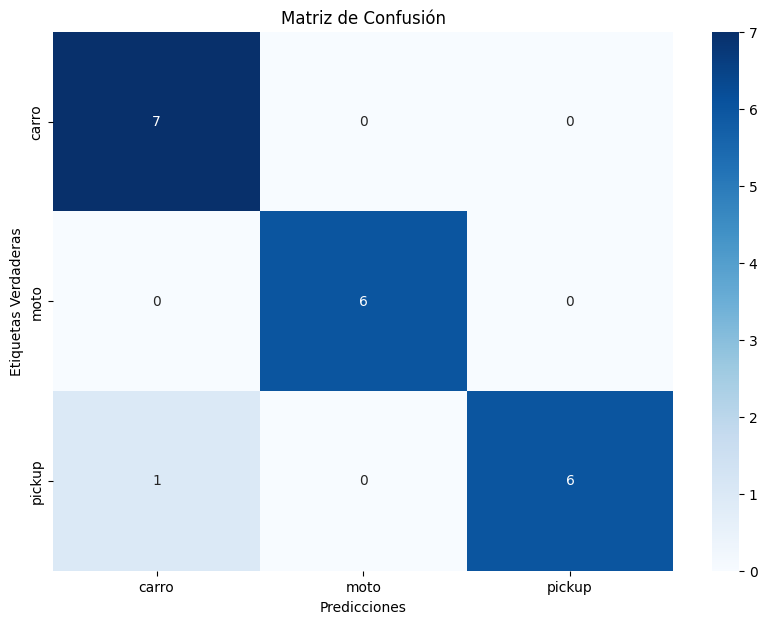

In [120]:
def graficar_matriz_confusion(cm, etiquetas):
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
  plt.xlabel('Predicciones')
  plt.ylabel('Etiquetas Verdaderas')
  plt.title('Matriz de Confusión')
  plt.show()

graficar_matriz_confusion(cm, label_encoder.classes_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
---------------------------------
AUC Score Promedio: 0.9807692307692308
---------------------------------


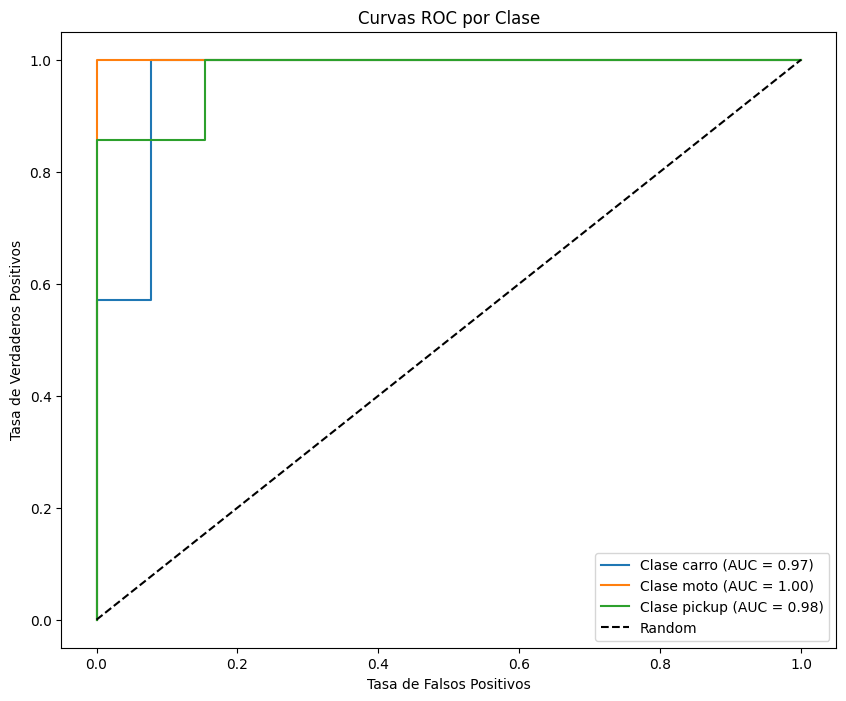

In [121]:
def calcular_roc_auc(modelo, X_test, y_test, label_encoder):
    y_test_binario = label_binarize(y_test, classes=label_encoder.classes_)
    y_pred_probabilidades = modelo.predict(X_test)

    true_positiveRate = {}
    false_positiveRate = {}
    roc_auc = {}

    for i in range(NUMERO_CLASES):
        false_positiveRate[i], true_positiveRate[i], _ = roc_curve(y_test_binario[:, i], y_pred_probabilidades[:, i])
        roc_auc[i] = auc(false_positiveRate[i], true_positiveRate[i])

    auc_score_promedio = roc_auc_score(y_test_binario, y_pred_probabilidades, average='weighted')
    return false_positiveRate, true_positiveRate, roc_auc, auc_score_promedio


false_positiveRate, true_positiveRate, roc_auc,auc_score_promedio  = calcular_roc_auc(modelo, X_test, y_test, label_encoder)

print("---------------------------------")
print(f"AUC Score Promedio: {auc_score_promedio}")
print("---------------------------------")

def graficar_roc_curve(false_positiveRate, true_positiveRate, roc_auc, etiquetas):
  plt.figure(figsize=(10, 8))
  for i in range(NUMERO_CLASES):
    plt.plot(false_positiveRate[i], true_positiveRate[i], label=f'Clase {etiquetas[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  plt.title('Curvas ROC por Clase')
  plt.legend(loc='lower right')
  plt.show()


graficar_roc_curve(false_positiveRate, true_positiveRate, roc_auc, label_encoder.classes_)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


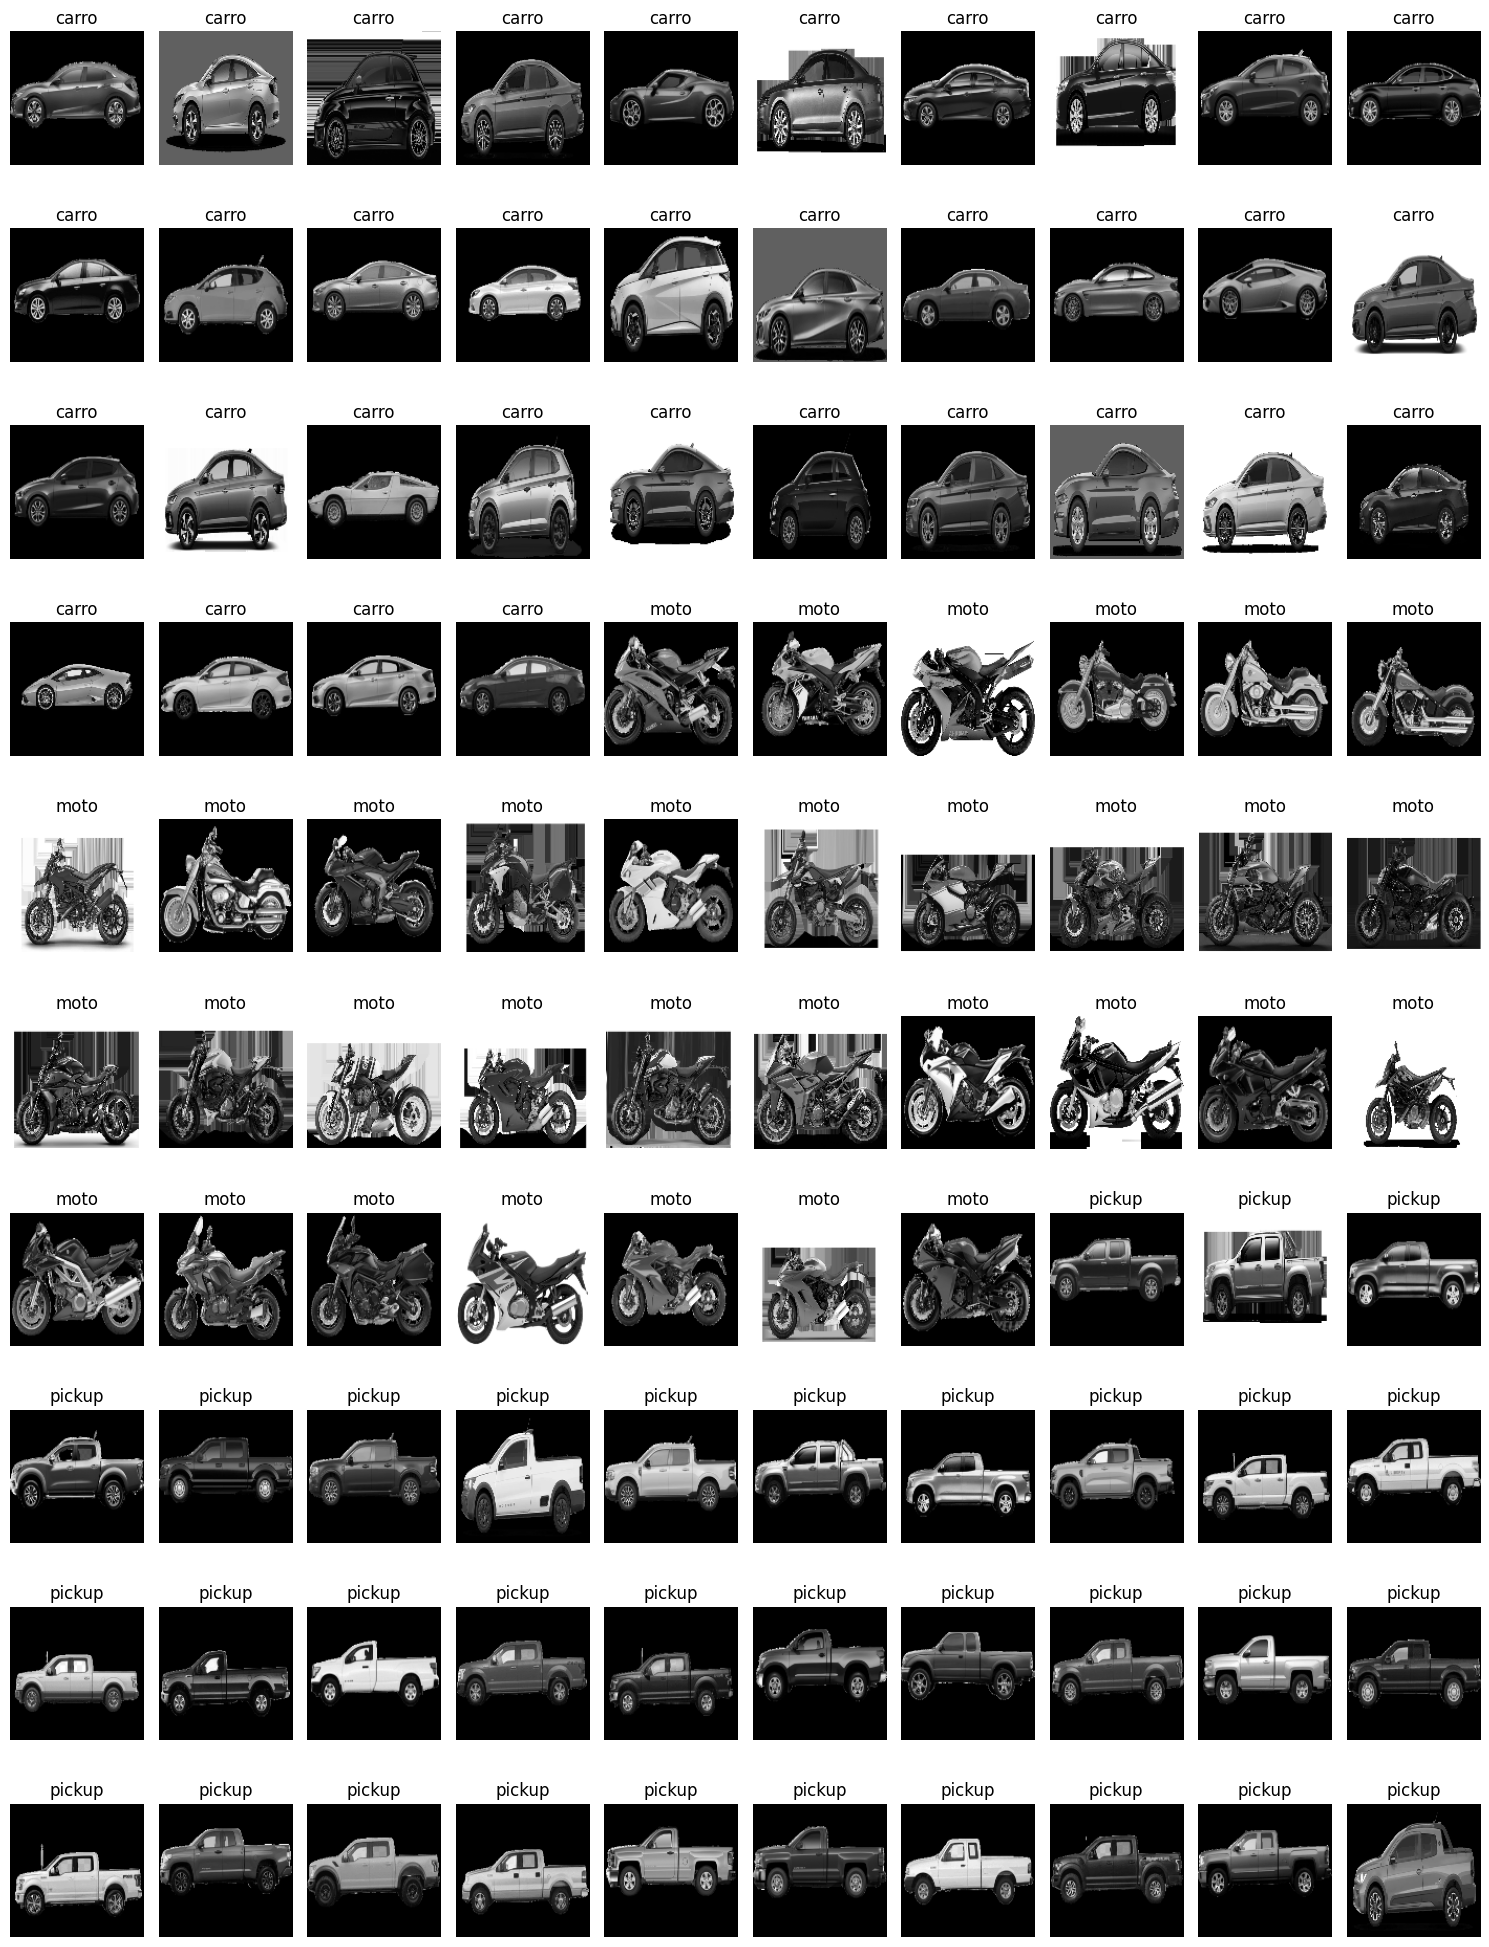

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_65 (Flatten)                 │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ (None, 300)                 │       4,915,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,954,415 (18.90 MB)

 Trainable params: 4,954,415 (18.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.4617 - loss: 1.9531 - val_accuracy: 0.7000 - val_loss: 1.3022
Epoch 2/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5328 - loss: 3.9109 - val_accuracy: 1.0000 - val_loss: 0.2883
Epoch 3/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6648 - loss: 2.5373 - val_accuracy: 0.8000 - val_loss: 0.5294
Epoch 4/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8313 - loss: 1.2540 - val_accuracy: 0.9000 - val_loss: 0.3893
Epoch 5/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9531 - loss: 0.6761 - val_accuracy: 0.9500 - val_loss: 0.1647
Epoch 6/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9734 - loss: 0.2595 - val_accuracy: 0.9500 - val_loss: 0.2352
Epoch 7/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9117 - loss: 0.5446 - val_accuracy: 0.7500 - val_loss: 0.4808
Epoch 8/9
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9758 - loss: 0.0957 - val_accuracy: 0.7500 - val_loss: 0.4412
Epo

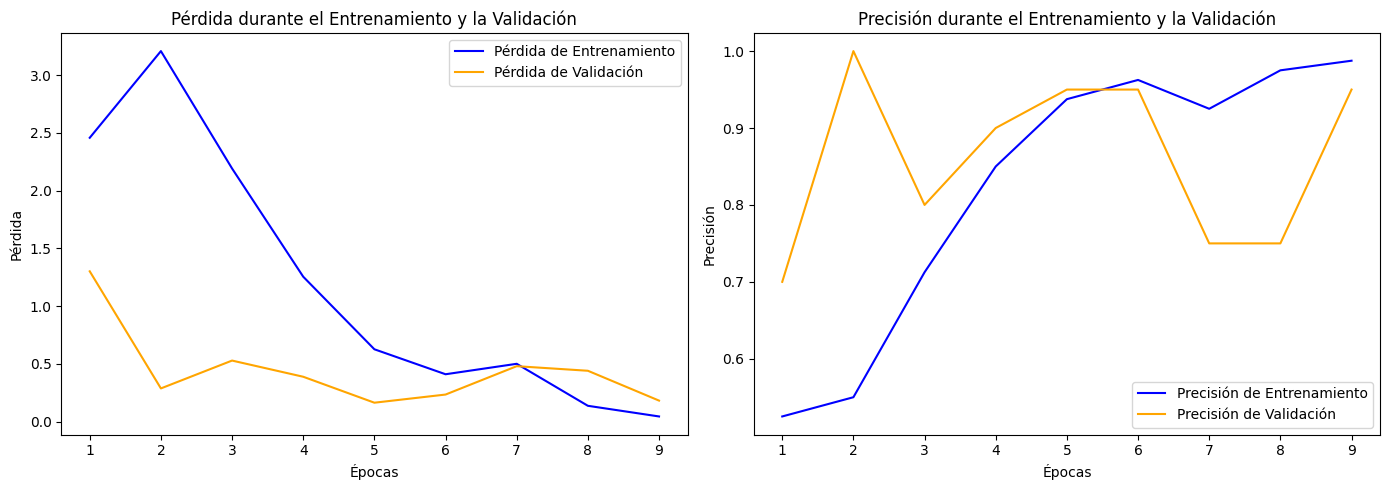

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9500 - loss: 0.1932
Pérdida del Modelo: 0.1931680291891098
Precisión del Modelo: 0.949999988079071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

       carro       0.88      1.00      0.93         7
        moto       1.00      1.00      1.00         6
      pickup       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Precisión del Modelo: 0.949999988079071


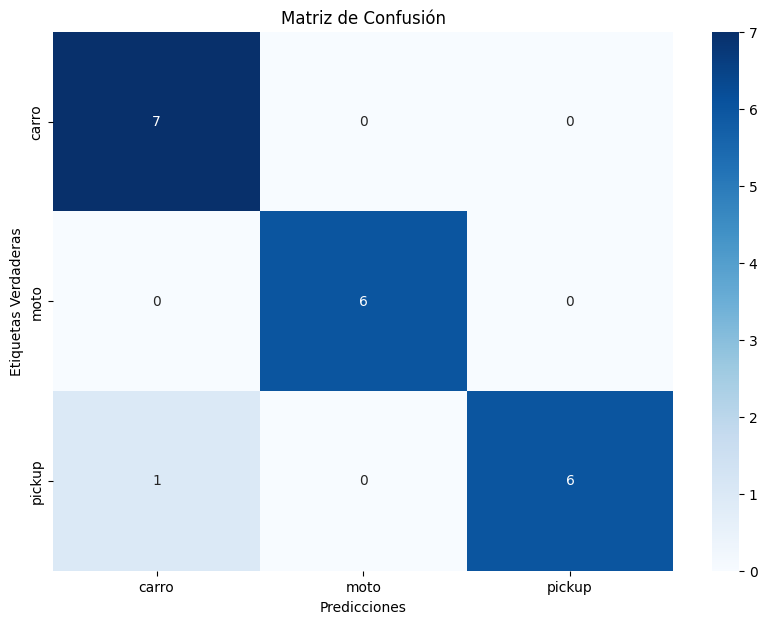

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
AUC Score Promedio: 0.973076923076923


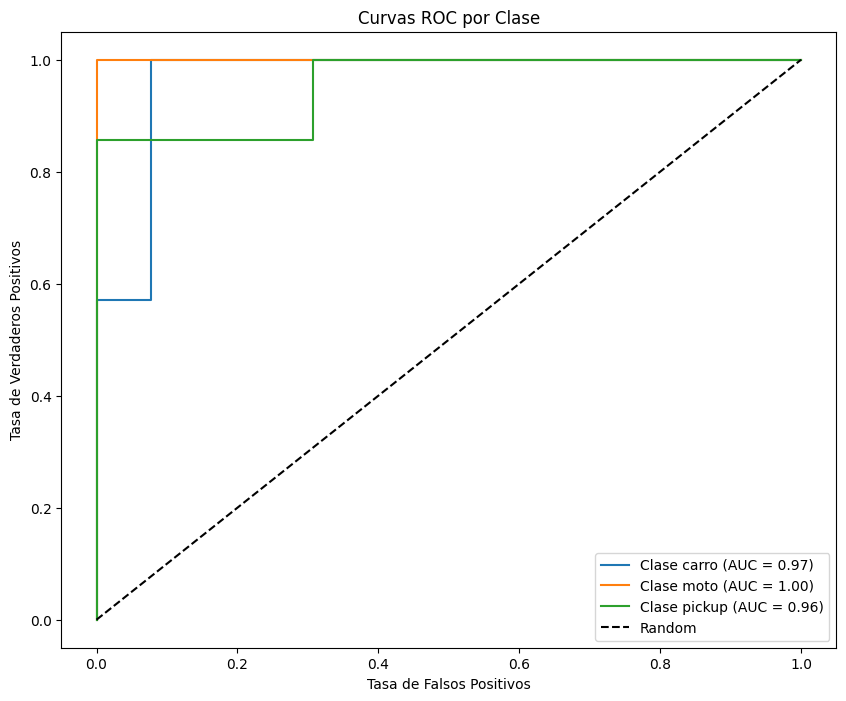

In [122]:
"Liberia y Configuracion Google Colab "
from google.colab import drive
drive.mount('/content/drive')

"Librerias basicas / Visualizacion"
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

"Librerias de Mechine Learning"
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score


"""
Constantes
"""
DATA_TRAIN_PATH = "/content/drive/MyDrive/Tec/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos/Evidencias/DataSet/training_data"
DATA_TEST_PATH = "/content/drive/MyDrive/Tec/Septimo Semestre/Inteligencia artificial avanzada para la ciencia de datos/Evidencias/DataSet/test_data"

MAPEO_ETIQUETAS = {'carros': 'carro',
                     'motos': 'moto',
                     'pickups': 'pickup'}

NUMERO_CLASES = len(MAPEO_ETIQUETAS)


nombre_etiquetas = list(MAPEO_ETIQUETAS.values())

# Crear un DataFrame con las etiquetas (solo para visualizacion en el Notebook )
df_etiquetas = pd.DataFrame(nombre_etiquetas, columns=['Nombre de las Etiquetas'])
df_etiquetas

X_train = [] # vectores del conjunto de entrenamiento
y_train = [] # etiquetas de conjunto de entrenamiento

X_test = [] # vectores del conjunto de prueba
y_test = [] # etiquetas de conjunto de prueba

TAMAÑO_IMAGEN = (128, 128)


"""
"""

def cargar_imagenes_desde_carpeta(carpeta, etiqueta, tamaño_imagen=TAMAÑO_IMAGEN):
    imagenes = []
    etiquetas = []
    for imagen in os.listdir(carpeta):
        img_path = os.path.join(carpeta, imagen)
        if img_path.lower().endswith('.png'):
            img = cv2.imread(img_path)
            if img is not None:
                #print(f"Tamaño original de la imagen: {img.shape}")  # Imprimir tamaño original
                img = cv2.resize(img, tamaño_imagen)
                #print(f"Tamaño después de redimensionar: {img.shape}")  # Imprimir tamaño después de redimensionar
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
                img = img.reshape((tamaño_imagen[0], tamaño_imagen[1], 1))  # Añadir la dimensión adicional de canal
                imagenes.append(img)
                etiquetas.append(etiqueta)
    return imagenes, etiquetas


for nombre_carpeta in os.listdir(DATA_TRAIN_PATH):
  carpeta_path = os.path.join(DATA_TRAIN_PATH, nombre_carpeta)
  etiqueta = MAPEO_ETIQUETAS.get(nombre_carpeta, nombre_carpeta)
  imagenes, etiquetas = cargar_imagenes_desde_carpeta(carpeta_path, etiqueta)
  X_train.extend(imagenes)
  y_train.extend(etiquetas)

for nombre_carpeta in os.listdir(DATA_TEST_PATH):
  carpeta_path = os.path.join(DATA_TEST_PATH, nombre_carpeta)
  etiqueta = MAPEO_ETIQUETAS.get(nombre_carpeta, nombre_carpeta)
  imagenes, etiquetas = cargar_imagenes_desde_carpeta(carpeta_path, etiqueta)
  X_test.extend(imagenes)
  y_test.extend(etiquetas)


# Convertir a numpy arrays
X_train = np.array(X_train)
#print(X_train.shape)
y_train = np.array(y_train)
X_test = np.array(X_test)
#print(X_test.shape)
y_test = np.array(y_test)

def graficar_frecuencia_etiquetas(etiquetas, t_conjunto):
  frecuencia_etiquetas = Counter(etiquetas)
  etiquetas = list(frecuencia_etiquetas.keys())
  frecuencias = list(frecuencia_etiquetas.values())
  titulo = f"Frecuencia de Etiquetas {t_conjunto}"

  df = {'Etiqueta': etiquetas,'Frecuencia': frecuencias}
  fig = px.bar(df, x='Etiqueta', y='Frecuencia', title=titulo, labels={'Etiqueta': 'Etiquetas', 'Frecuencia': 'Frecuencia'}, color='Etiqueta')
  fig.show()

graficar_frecuencia_etiquetas(y_train, "entrenamiento")
graficar_frecuencia_etiquetas(y_test, "prueba")

def graficar_imagenes_con_etiquetas(imagenes, etiquetas):

  plt.figure(figsize=(15, 20))
  for i in range(len(imagenes)):
    plt.subplot(10, 10, i + 1) # 10x10 = 100
    plt.imshow(cv2.cvtColor(imagenes[i], cv2.COLOR_BGR2RGB))
    plt.title(etiquetas[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

graficar_imagenes_con_etiquetas(X_train, y_train)


"""
Normalizar las imagenes
"""
def normalizar(datos):
  return np.array(datos).astype(float) / 255.0

X_train =  normalizar(X_train)
X_test = normalizar(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
df_etiquetas_encoded = pd.DataFrame({'Etiqueta Original': label_encoder.classes_, 'Etiqueta Codificada': label_encoder.transform(label_encoder.classes_)})
y_train_one_hot = to_categorical(y_train_encoded)


"""
Construir el modelo de red neuronal densa
"""

def modelo_red_neuronal_densa(input_shape=(128,128,1), num_clases= 3):
  modelo = Sequential()
  modelo.add(Flatten(input_shape=input_shape)) #capa de entrada 128x128 = 16384
  modelo.add(Dense(300, activation='relu')) #capa oculta 1: 3000
  modelo.add(Dense(128, activation='relu')) #capa oculta 2: 128
  modelo.add(Dense(num_clases, activation='softmax')) #capa oculta : 3
  return modelo

modelo = modelo_red_neuronal_densa()

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.summary()

historial = modelo.fit(X_train, y_train_one_hot, epochs=9, batch_size=32, validation_split=0.2,verbose=1 )

# Función para graficar el historial de entrenamiento
def graficar_historial(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)


    plt.figure(figsize=(14, 5))

    # Gráfico de la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Pérdida de Entrenamiento', color='blue')
    plt.plot(epochs, val_loss, label='Pérdida de Validación', color='orange')
    plt.title('Pérdida durante el Entrenamiento y la Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico de la precisión
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Precisión de Entrenamiento', color='blue')
    plt.plot(epochs, val_accuracy, label='Precisión de Validación', color='orange')
    plt.title('Precisión durante el Entrenamiento y la Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
graficar_historial(historial)

def evaluar_modelo(modelo, X_test, y_test, label_encoder):
  loss, accuracy = modelo.evaluate(X_test, to_categorical(label_encoder.transform(y_test)), verbose=1)
  print(f"Pérdida del Modelo: {loss}")
  print(f"Precisión del Modelo: {accuracy}")

  y_pred = modelo.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  y_test_decoded = label_encoder.transform(y_test)

  print("Reporte de Clasificación:")
  print(classification_report(y_test_decoded, y_pred_classes, target_names=label_encoder.classes_))

  exactitud = accuracy_score(y_test_decoded, y_pred_classes)
  precision = precision_score(y_test_decoded, y_pred_classes, average='weighted')
  recall = recall_score(y_test_decoded, y_pred_classes, average='weighted')
  f1 = f1_score(y_test_decoded, y_pred_classes, average='weighted')

  df_metricas = ({
      'Metrica': ['Exactitud', 'Precision', 'Recall', 'F1-Score'],
      'Valor': [exactitud, precision, recall, f1]
  })

  print(f"Precisión del Modelo: {accuracy}")


  cm = confusion_matrix(y_test_decoded, y_pred_classes)
  return df_metricas, cm

df_metricas, cm = evaluar_modelo(modelo, X_test, y_test, label_encoder)

def graficar_matriz_confusion(cm, etiquetas):
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
  plt.xlabel('Predicciones')
  plt.ylabel('Etiquetas Verdaderas')
  plt.title('Matriz de Confusión')
  plt.show()

graficar_matriz_confusion(cm, label_encoder.classes_)

def calcular_roc_auc(modelo, X_test, y_test, label_encoder):
    y_test_binario = label_binarize(y_test, classes=label_encoder.classes_)
    y_pred_probabilidades = modelo.predict(X_test)

    true_positiveRate = {}
    false_positiveRate = {}
    roc_auc = {}

    for i in range(NUMERO_CLASES):
        false_positiveRate[i], true_positiveRate[i], _ = roc_curve(y_test_binario[:, i], y_pred_probabilidades[:, i])
        roc_auc[i] = auc(false_positiveRate[i], true_positiveRate[i])

    auc_score_promedio = roc_auc_score(y_test_binario, y_pred_probabilidades, average='weighted')
    return false_positiveRate, true_positiveRate, roc_auc, auc_score_promedio


false_positiveRate, true_positiveRate, roc_auc,auc_score_promedio  = calcular_roc_auc(modelo, X_test, y_test, label_encoder)

#print(false_positiveRate)
#print(true_positiveRate)
#print(roc_auc)
print(f"AUC Score Promedio: {auc_score_promedio}")

def graficar_roc_curve(false_positiveRate, true_positiveRate, roc_auc, etiquetas):
  plt.figure(figsize=(10, 8))
  for i in range(NUMERO_CLASES):
    plt.plot(false_positiveRate[i], true_positiveRate[i], label=f'Clase {etiquetas[i]} (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], 'k--', label='Random')
  plt.xlabel('Tasa de Falsos Positivos')
  plt.ylabel('Tasa de Verdaderos Positivos')
  plt.title('Curvas ROC por Clase')
  plt.legend(loc='lower right')
  plt.show()


graficar_roc_curve(false_positiveRate, true_positiveRate, roc_auc, label_encoder.classes_)
